In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [2]:
#importing the basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('Churn_Modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
## feature Engineering

geography = pd.get_dummies(X['Geography'], drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)

In [7]:
# Drop the categorical features beacuse we already convert to integer
X = X.drop(['Geography', 'Gender'], axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
## concate the these variables to dataframe
X = pd.concat([X, geography, gender], axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
## splitting the data into the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
X_train.shape

(8000, 11)

In [16]:
## part-2 create the ANN

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [18]:
## let's Initialize the ANN

classifier = Sequential()

In [19]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [20]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [21]:
# adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [22]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [23]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [26]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.8089 - loss: 0.4605 - val_accuracy: 0.8311 - val_loss: 0.3831
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8565 - loss: 0.3548 - val_accuracy: 0.8410 - val_loss: 0.3697
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8676 - loss: 0.3408 - val_accuracy: 0.8395 - val_loss: 0.3615
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8601 - loss: 0.3449 - val_accuracy: 0.8501 - val_loss: 0.3541
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8509 - loss: 0.3459 - val_accuracy: 0.8459 - val_loss: 0.3731
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8583 - loss: 0.3359 - val_accuracy: 0.8554 - val_loss: 0.3543
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8587 - loss: 0.3330 - val_accuracy: 0.8542 - val_loss: 0.3520
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8671 -

In [27]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

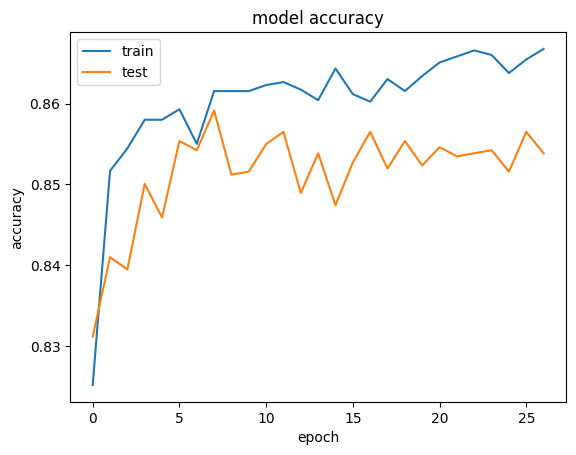

In [28]:
# summarize the history of accurarcy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

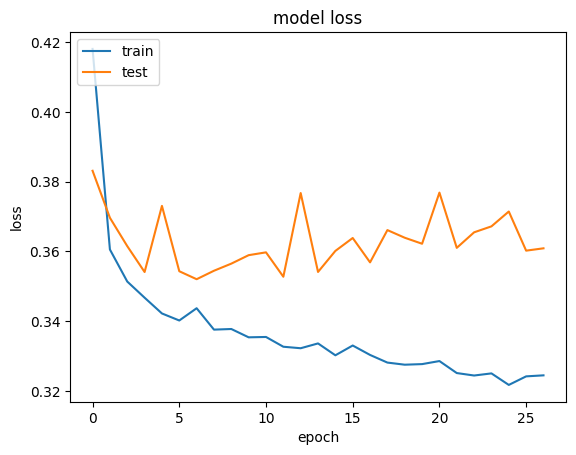

In [29]:
# summarize the history of Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
## prediction

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


In [31]:
# make confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1516,   79],
       [ 226,  179]])

In [32]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8475

In [33]:
## get the weights
classifier.get_weights()

[array([[-7.18180776e-01, -8.13721642e-02,  5.69666743e-01,
          1.32713273e-01,  4.08680141e-01,  1.10401797e+00,
         -1.33794561e-01, -4.32809353e-01, -3.16934973e-01,
         -5.87101793e-04,  1.13553238e+00],
        [ 2.00285244e+00, -1.14061214e-01, -7.33759284e-01,
         -2.10690928e+00, -1.68234646e-01, -1.85148537e+00,
          2.18648839e+00, -1.94425833e+00,  2.79938412e+00,
         -7.41565526e-01, -1.55666435e+00],
        [-5.77054262e-01,  1.51949614e-01,  2.22408563e-01,
         -8.68994117e-01,  5.13686776e-01, -2.28153452e-01,
          1.44732539e-02,  1.76936798e-02, -3.64783823e-01,
          4.91716623e-01,  1.35341689e-01],
        [-3.27851713e-01, -2.98911810e+00, -1.38421404e+00,
         -9.98605251e-01, -1.85892570e+00,  9.94314015e-01,
          2.36547738e-01,  1.04360200e-01, -4.28582728e-01,
         -1.74682975e+00, -8.85808989e-02],
        [-8.93755555e-01, -2.91341114e+00,  1.77908349e+00,
          6.04598701e-01, -6.16455197e-01,  